### KMeans Clustering

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
d=load_iris()
df=pd.DataFrame(d.data,columns=d.feature_names)
df.drop(columns=['petal length (cm)','petal width (cm)'],inplace=True)
df.rename(columns={"sepal length (cm)": "s_len","sepal width (cm)":"s_wid"},inplace=True)
df

,s_len,s_wid
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


,s_len,s_wid
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


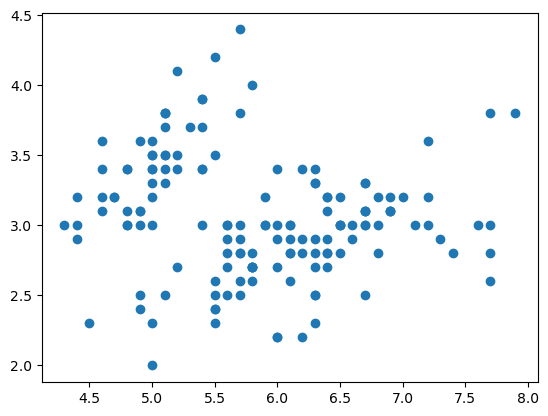

In [4]:
plt.scatter(df.s_len,df.s_wid)
df

In [5]:
scaler=StandardScaler()
df[['s_len_scaled','s_wid_scaled']]=scaler.fit_transform(df)
df=df[['s_len_scaled','s_wid_scaled']]
df
#df['s_wid_scaled']=scaler.fit_transform(df[['s_wid']])

,s_len_scaled,s_wid_scaled
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


In [6]:
kmeans=KMeans(n_clusters=3)

In [7]:
df

,s_len_scaled,s_wid_scaled
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201
...,...,...
145,1.038005,-0.131979
146,0.553333,-1.282963
147,0.795669,-0.131979
148,0.432165,0.788808


In [46]:
y=kmeans.fit_predict(df)
y
kmeans.cluster_centers_,kmeans.inertia_

C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([[ 1.84982949e+00, -3.39156569e-01,  2.00000000e+00],
        [-9.69919953e-01,  9.31310346e-01,  1.00000000e+00],
        [ 3.23114321e-02, -5.61680110e-01,  3.33066907e-16],
        [ 8.08768245e-01,  8.57742185e-02,  2.00000000e+00],
        [ 5.01404188e-01, -1.64470109e+00,  0.00000000e+00],
        [-1.38535265e+00,  5.50553933e-02,  1.00000000e+00],
        [-5.47274882e-01,  1.99734061e+00,  1.00000000e+00],
        [ 2.12851559e+00,  1.55613014e+00,  2.00000000e+00],
        [-7.27584213e-01, -1.46383220e+00, -2.22044605e-16]]),
 31.50693741662461)

In [9]:
df['cluster']=y
df0=df[df['cluster']==0]
df1=df[df['cluster']==1]
df2=df[df['cluster']==2]

C:\Users\pramo\AppData\Local\Temp\ipykernel_16888\946823531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=y


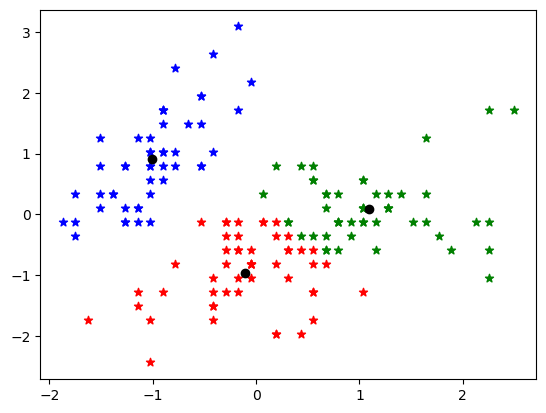

In [10]:
plt.scatter(df0.s_len_scaled,df0.s_wid_scaled,marker="*",color='red')
plt.scatter(df1.s_len_scaled,df1.s_wid_scaled,marker="*",color='blue')
plt.scatter(df2.s_len_scaled,df2.s_wid_scaled,marker="*",color='green')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="o",color='black')

In [34]:
ssr=[]
k=range(1,10)
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit_predict(df[['s_len_scaled','s_wid_scaled']])
    ssr.append(kmeans.inertia_)


C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pramo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

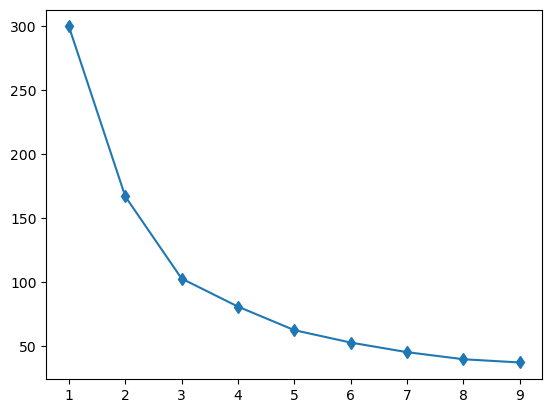

In [44]:
plt.plot(k,ssr,marker='d')

### Cross Validation

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [12]:
bc=load_iris()
kf=KFold(n_splits=10)
sf=StratifiedKFold(n_splits=10)

In [13]:
cross_val_score(LogisticRegression(max_iter=300),bc.data,bc.target,cv=kf).mean(),cross_val_score(LogisticRegression(max_iter=300),bc.data,bc.target,cv=sf).mean()

(0.9466666666666667, 0.9733333333333334)